# 1. Build your own convolutional neural network using pytorch

In [1]:
# Importing the libraries
from torch import nn,load,save
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
from torchvision.transforms import ToTensor
import torch
import os
import torch.optim as optim
import torch.nn.functional as F 
import matplotlib.pyplot as plt

In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
# Creating the transform 
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

In [4]:
# Defining the train data source
train_src = '/content/drive/MyDrive/Colab Notebooks/Project 1/Train_1'


In [5]:
# Defining Train Loaders 
import torchvision
trainset = torchvision.datasets.ImageFolder(root=train_src,transform=transform)
train_loader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [6]:
# Looking at the images in each class folder
import pandas as pd

# Get the class-to-index mapping
class_to_idx = trainset.class_to_idx

# Initialize an empty dictionary to store the class counts
class_counts = {}

# iterate over the class folders and count the number of images in each folder
for class_name, idx in class_to_idx.items():
    class_folder = trainset.root + '/' + class_name
    class_count = len(os.listdir(class_folder))
    class_counts[class_name] = class_count
    
# Create a dataframe from the class counts dictionary
df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Count'])

# Display the dataframe
df


,Count
Score_1,450
Score_2,491
Score_3,187
Score_4,21


In [7]:
#The residual block created was not working so I just left it out.
#Creating Residual Blocks
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1 )
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

In [8]:
#Defining the Network Architecture
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv6 = nn.Conv2d(256, 512, 3, padding=1)
        self.conv7 = nn.Conv2d(512, 1024, 3, padding=1)
        self.conv8 = nn.Conv2d(1024, 2048, 3, padding=1)
        self.conv9 = nn.Conv2d(2048, 4096, 3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(36864, 256)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 4)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)  
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)  
        x = self.pool(x)
        x = self.conv3(x)
        x = F.relu(x)  
        x = self.pool(x)
        x = self.conv4(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv5(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv6(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv7(x)
        x = F.relu(x)
        x = self.conv8(x)
        x = F.relu(x)
        x = self.conv9(x)
        x = F.relu(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [9]:
#Instantiating the the model , loss function and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [10]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device used for training: {device}")

# Define the model into GPU
model = Net()
model.to(device)

Device used for training: cuda


Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(1024, 2048, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv9): Conv2d(2048, 4096, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=36864, out_features=256, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=4, 

In [11]:
#Just to print the output the num_epochs is kept 20 .The model was teained on 100 epochs
num_epochs = 100
loss_list=[]
# check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  
# move the model to GPU
net.to(device)  

for epoch in range(num_epochs):
    running_loss = 0.0
    
        
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        # move the data to GPU
        inputs, labels = inputs.to(device), labels.to(device)  
        
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    loss_list.append(running_loss/len(train_loader))
    print('Epoch [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, running_loss/len(train_loader)))
  
print('Training Complete--------------------------------------------------------------------------------------')


Epoch [1/100], Loss: 1.2284
Epoch [2/100], Loss: 1.1325
Epoch [3/100], Loss: 1.1141
Epoch [4/100], Loss: 1.1228
Epoch [5/100], Loss: 1.1055
Epoch [6/100], Loss: 1.1193
Epoch [7/100], Loss: 1.1153
Epoch [8/100], Loss: 1.1102
Epoch [9/100], Loss: 1.1056
Epoch [10/100], Loss: 1.1122
Epoch [11/100], Loss: 1.1118
Epoch [12/100], Loss: 1.1113
Epoch [13/100], Loss: 1.1066
Epoch [14/100], Loss: 1.1045
Epoch [15/100], Loss: 1.1061
Epoch [16/100], Loss: 1.1064
Epoch [17/100], Loss: 1.1043
Epoch [18/100], Loss: 1.1122
Epoch [19/100], Loss: 1.1066
Epoch [20/100], Loss: 1.0996
Epoch [21/100], Loss: 1.1097
Epoch [22/100], Loss: 1.1087
Epoch [23/100], Loss: 1.1080
Epoch [24/100], Loss: 1.1049
Epoch [25/100], Loss: 1.1086
Epoch [26/100], Loss: 1.1060
Epoch [27/100], Loss: 1.1054
Epoch [28/100], Loss: 1.1039
Epoch [29/100], Loss: 1.1119
Epoch [30/100], Loss: 1.1108
Epoch [31/100], Loss: 1.1079
Epoch [32/100], Loss: 1.1098
Epoch [33/100], Loss: 1.1100
Epoch [34/100], Loss: 1.1147
Epoch [35/100], Loss: 1

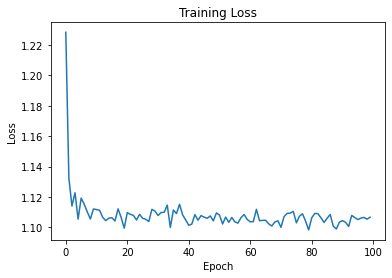

In [12]:
# plot the loss over time
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [13]:
#Saving the created model
torch.save(net.state_dict(), '/content/drive/MyDrive/Colab Notebooks/Project 1/9LCNNtest2.pth')

In [14]:
#Define the test sorce data 
test_src = '/content/drive/MyDrive/Colab Notebooks/Project 1/Test'

In [15]:
#Loading the test image source
import os
test_images = os.listdir(test_src)

In [16]:
#Custom Test Loader
from PIL import Image

test_data=[]
for img_name in test_images: #looping over the test dir to load each image
    img = Image.open(os.path.join(test_src, img_name))
    img_tensor = transform(img)
    test_data.append(img_tensor)

# create dummy labels for the test data
test_labels = [0] * len(test_data)

In [17]:
# Create a DataLoader object for the test dataset
test_dataset = torch.utils.data.TensorDataset(torch.stack(test_data), torch.tensor(test_labels))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [18]:
#Instantiating the neural network
net = Net()

#loading the weights and baises from the saved file to the neural network for predicting the labels  
net.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/Project 1/9LCNNtest2.pth'))

<All keys matched successfully>

In [19]:
#Evaluating the test images for label prediction
net.eval() 

test_predictions = []
with torch.no_grad(): 
    for images, labels in test_loader:
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        test_predictions.extend(predicted.tolist())

In [20]:
test_labels=[]
#looping over the test dir to load each image
for img_name in test_images: 
    test_labels.append(img_name)


In [21]:
#Writing the predictions into a csv file
import csv
with open('/content/drive/MyDrive/Colab Notebooks/Project 1/9LCNNtest2.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    for filename, prediction in zip(test_labels, test_predictions):
        writer.writerow([filename, prediction])


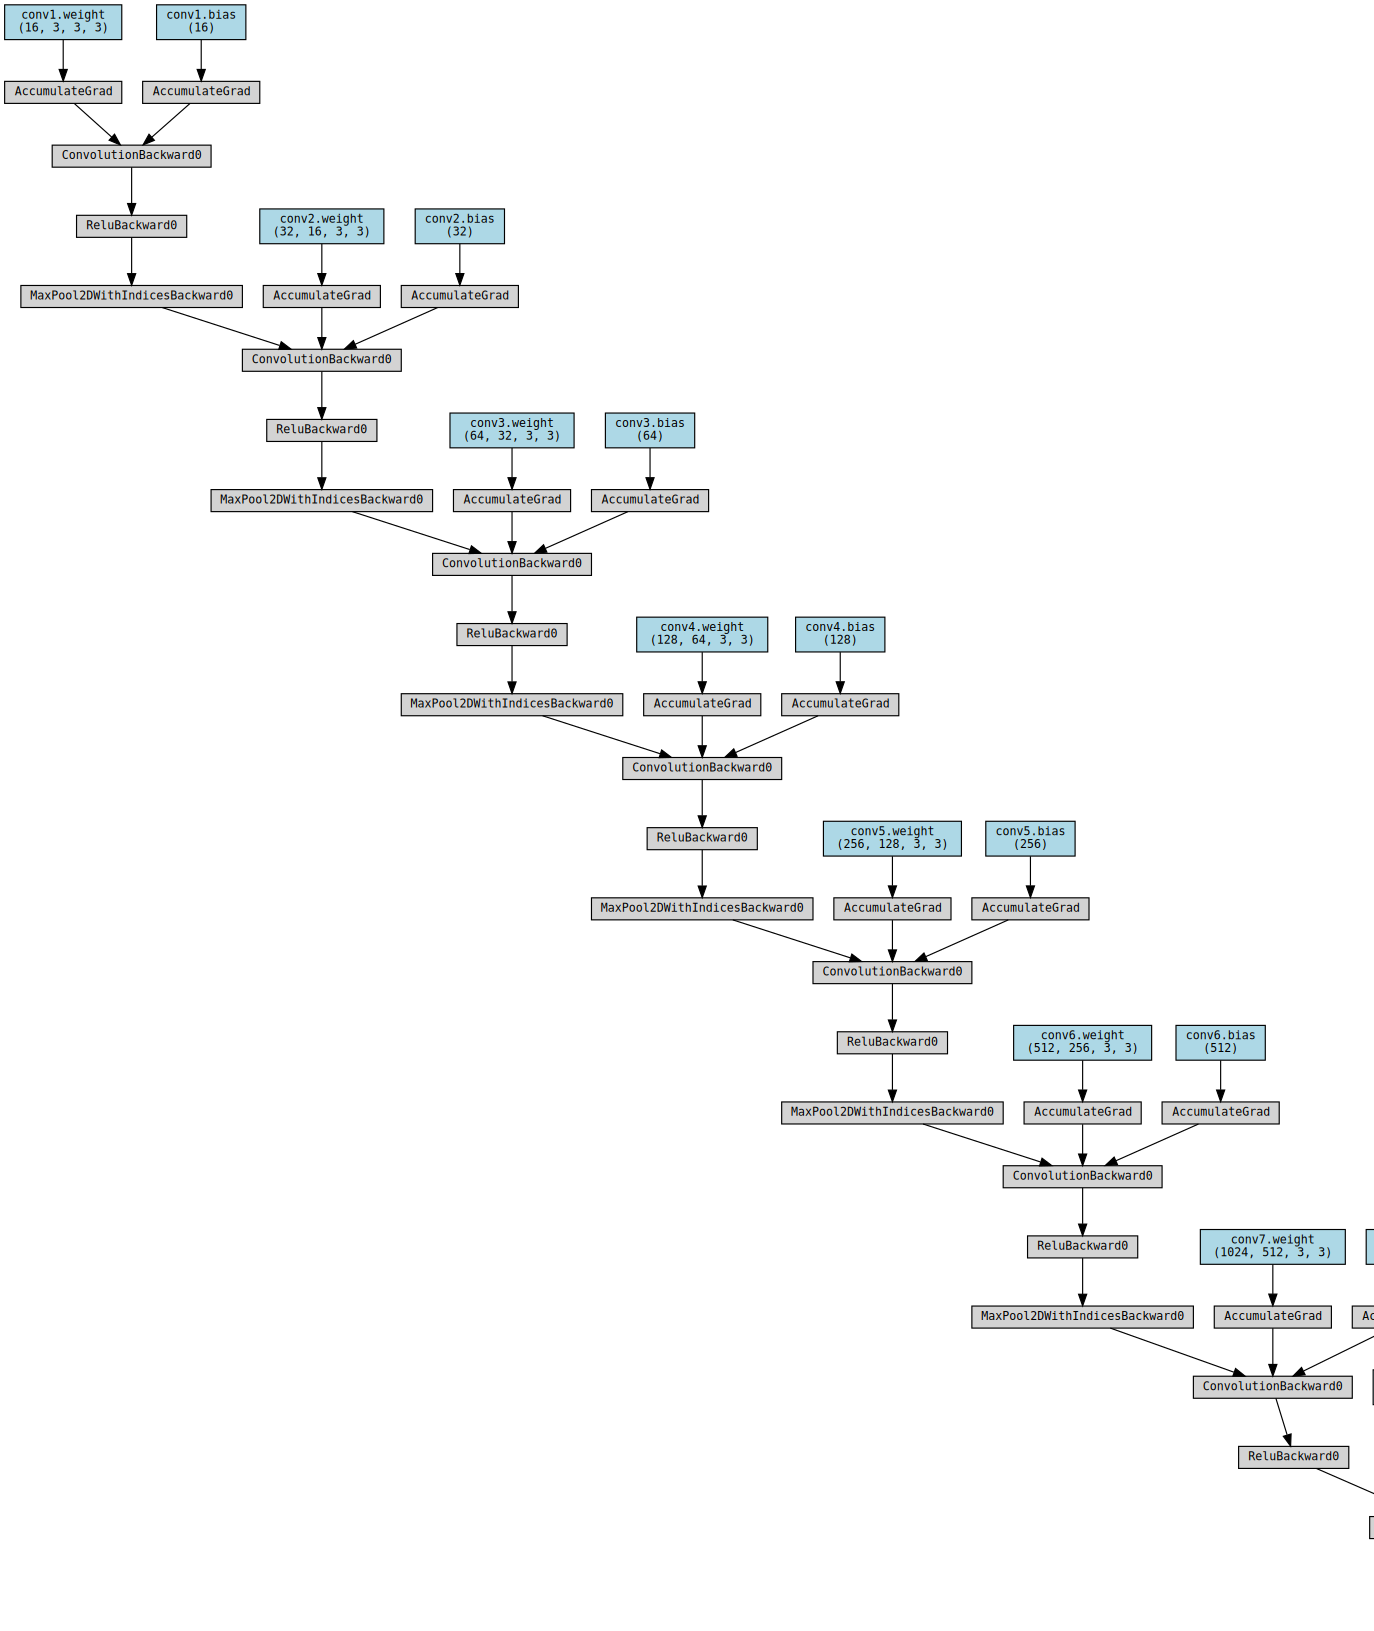

In [23]:
#Printing the network architecture of an arbitary test tensor
from torchviz import make_dot
import torch

# create a random image tensor from the test loader
images, labels = next(iter(test_loader))
image_tensor = images[0].unsqueeze(0)

# create an instance of the model
model = Net()

# pass the image through the model to get the output
output = model(image_tensor)

# create the architecture diagram
dot = make_dot(output, params=dict(model.named_parameters()))

dot

# 3. Evaluate your model using the developed software

The model after evaluation gives an accuracy of 60.53%

The research paper report is uploaded to ResearchGate.

Link : https://www.researchgate.net/publication/369479331_Defining_a_Neural_Network_for_Cow_Teat_Classification_using_CNN